## About

Working with famous Iris Dataset.

### Links

* [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)
* Original Articles
    - [Notebook](http://nbviewer.ipython.org/url/astroml.github.com/sklearn_tutorial/_downloads/02_iris_classification.ipynb)
    - [Detailed Description](http://www.astroml.org/sklearn_tutorial/general_concepts.html)

### Dependecies

```
pip install sklearn
```

## Creating First Model

### Loading Data

The first step is always a data loading. We are lucky because iris dataset is already emdeded into machine learning package.

In [28]:
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

### Data Understanding

In the iris dataset example, suppose we are assigned the task to guess the class of an individual flower given the measurements of petals and sepals. This is a classification task.

In [2]:
X, y = iris.data, iris.target

### Selecting Classifier

After putting data into proper format it is trivial to train a classifier. For instance a support vector machine with a linear kernel.


In [3]:
from sklearn.svm import LinearSVC

### Getting Help On Classifier

LinearSVC is an example of a scikit-learn classifier. If you're curious about how it is used, you can use ipython's "?" magic function to see the documentation:

In [4]:
LinearSVC?

### Creating Classifier Instance

The first thing to do is to create an instance of the classifier. This can be done simply by calling the class name, with any arguments that the object accepts.


In [5]:
clf = LinearSVC(loss = 'l2')

### About Created Instance

**clf** is a statistical model that has parameters that control the learning algorithm (those parameters are sometimes called the hyperparameters). Those hyperparameters can be supplied by the user in the constructor of the model. We will explain later how to choose a good combination using either simple empirical rules or data driven selection:


In [6]:
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

### Fitting (Creating) Model

By default the model parameters are not initialized. They will be tuned automatically from the data by calling the fit method with the data X and labels y.


In [7]:
clf = clf.fit(X, y)
print clf.coef_
print clf.intercept_

[[ 0.18424592  0.4512317  -0.80794299 -0.45071418]
 [ 0.04945727 -0.88825746  0.40632914 -0.93884757]
 [-0.85051295 -0.98665139  1.38104429  1.86545913]]
[ 0.10956228  1.66980727 -1.70954822]


### Using Model

Once the model is trained, it can be used to predict the most likely outcome on unseen data. For instance let us define a list of simple sample that looks like the first sample of the iris dataset.

In [8]:
X_new = [[ 5.0,  3.6,  1.3,  0.25]]

print clf.predict(X_new)

[0]


## Using Other Classifiers


There are many possibilities of classifiers; you could try any of the methods discussed at http://scikit-learn.org/stable/supervised_learning.html. Alternatively, you can explore what's available in scikit-learn using just the tab-completion feature. For example, import the linear_model submodule.

And use the tab completion to find what's available. Type linear_model. and then the tab key to see an interactive list of the functions within this submodule. The ones which begin with capital letters are the models which are available.


## Creating Model with SVM

In [9]:
from sklearn.svm import SVC
# SVC?

In [10]:
clfSVC = SVC()
clfSVC = clfSVC.fit(X, y)
print 'Intercept_: {0}\n'.format(clfSVC.intercept_)
print clfSVC

Intercept_: [-0.03985691 -0.16777453 -0.14370469]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


#### Evaluating obtained model

In [11]:
import numpy as np

correct = y
estimated = clfSVC.predict(X)
compared = np.in1d(correct, estimated)

print 'Correct: {0}\nTotal: {1}\nPercentage:'.format(compared.sum(), len(correct))

Correct: 150
Total: 150
Percentage:


## Creating Model with Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [15]:
clfLR = LogisticRegression().fit(X, y)
print 'Intercept_: {0}\n'.format(clfLR.intercept_)
print clfLR

Intercept_: [ 0.26560617  1.08542374 -1.21471458]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)



Evaluating obtained model


In [16]:
import numpy as np

correct = y
estimated_proba = clfLR.predict_proba(X)
estimated = clfLR.predict(X)
    
print 'Correct: {0}\nTotal: {1}\nPercentage:'.format(compared.sum(), len(correct))



Correct: 150
Total: 150
Percentage:


### Normalization and Visualizing Dataset with PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

In [22]:
pca.components_  

array([[ 0.17650757, -0.04015901,  0.41812992,  0.17516725],
       [-1.33840478, -1.48757227,  0.35831476,  0.15229463]])

In [24]:
print pca.explained_variance_ratio_  
print pca.explained_variance_ratio_.sum()

[ 0.92461621  0.05301557]
0.977631775025


In [25]:
X_pca = pca.transform(X)

In [18]:
import pylab as pl
from itertools import cycle

In [31]:
def plot_2D(data, target, target_names):

    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()
    pl.show()

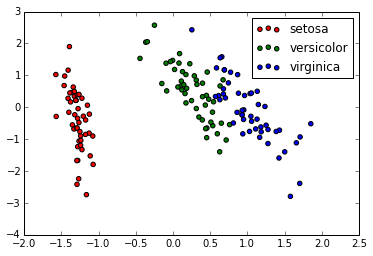

In [32]:
plot_2D(X_pca, iris.target, iris.target_names)

### Clustering

In [33]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(42)

In [34]:
kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)

In [35]:
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.02, -0.71],
       [ 0.33,  0.89],
       [-1.29, -0.44]])

In [39]:
print kmeans.labels_[:10]
print kmeans.labels_[-10:]

[2 2 2 2 2 2 2 2 2 2]
[0 0 1 0 0 0 1 0 0 1]


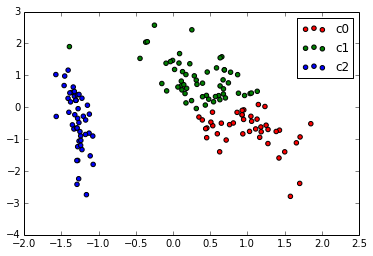

In [40]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])